<a href="https://colab.research.google.com/github/hwankang/chemometrics-tutorials/blob/master/decisonTree_fail_Tues_9_13_12_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정트리 
*   분류와 회귀에 사용되는 지도학습 방법 
*   if-then-else 결정규칙을 이용함 
* 장점 
 > * 시각화용이 
 *전처리 불필요
 *수치형과 범주형에 모두 적합



In [2]:
import pandas as pd
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pyplot as plt 
plt.style.use(['seaborn-whitegrid'])

In [3]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# 분류를 위한 데이터

# 붓꽃 데이터 

In [4]:
iris =load_iris()

In [5]:
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['target']=iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# 와인 데이터 

In [7]:
wine =load_wine()
wine_df=pd.DataFrame(data=wine.data,columns=wine.feature_names)
wine_df['target']=wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


#유방암 데이터 

In [9]:
cancer = load_breast_cancer()
cancer_df=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
cancer_df['target']=cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


#회귀를 위한 데이터 

#보스턴 데이터 

In [10]:
boston = load_boston()
boston_df=pd.DataFrame(data=boston.data,columns=boston.feature_names)
boston_df['target']=boston.target
boston_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 당뇨병 데이터

In [11]:
diabetes = load_diabetes()
diabetes_df=pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)
diabetes_df['target']=diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


# 분류 -DecisionTreeClassifier()
* DecisionTreeClassifier는 분류룰 위한 검종트리 모델
*두개의 배열 X, y를 입력받음 
 > * X는 [n_samples,n_features] 크기의 데이터 특성 배열
 * y는 [n_sample] 크기의 정답배열



In [12]:
X=[[0,0],[1,1]]
y=[0,1]

model =tree.DecisionTreeClassifier()
model=model.fit(X,y)

In [13]:
model.predict([[2.,2.]])

array([1])

In [15]:
model.predict_proba([[2.,2]])

array([[0., 1.]])

#붓꽃 데이터 학습
 # 교차검증 
 > * 전처리없이 학습


In [17]:
model = DecisionTreeClassifier()

In [19]:
cross_val_score(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=10,
    n_jobs=multiprocessing.cpu_count()
)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

 > * 전처리 후 학습
   > > * 결정 트리 규칙을 학습하기 때문에 전처리에 영향 받지 않음 

In [21]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

In [22]:
cross_val_score(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=10,
    n_jobs=multiprocessing.cpu_count()
)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

# 학습된 결정트리 시각화

In [25]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

# 텍스트를 통한 시각화 

In [26]:
r = tree.export_text(decision_tree=model,
                     feature_names=iris.feature_names)
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



#plot tree 를 이용한 출력 

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

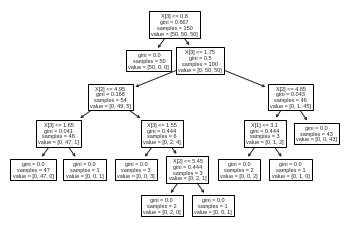

In [27]:
tree.plot_tree(model)

#graphviz 를 사용한 시각화

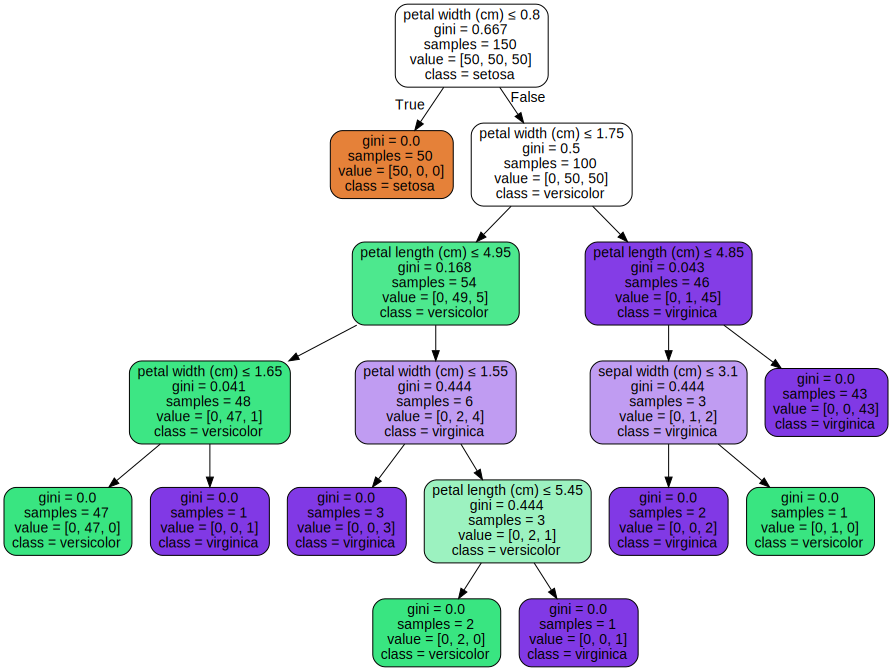

In [30]:
dot_data=tree.export_graphviz(decision_tree=model,
                              feature_names=iris.feature_names,
                              class_names=iris.target_names,
                              filled=True, rounded=True,
                              special_characters=True)
graph=graphviz.Source(dot_data)
graph

#시각화 

In [32]:
n_classes =3 
plot_colors='rgb'
plot_step=0.07

In [33]:
plt.figure(figsize=(14,8))
for pairidx,pair in enumerate([0,1],[0,2],[0,3],
                              [1,2],[1,3],
                              [2,3]):
    X =iris.data[:,pair]
    y= iris.target

    model =DecisionTreeClassifier()
    model=model.fit(X,y)

    plt.subplot(2,3,pairidx+1)

    x_min, x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min, y_max=X[:,0].min()-1,X[:,0].max()+1
    xx, yy=np.meshgrid(np.arange(x_min,x_max,plot_step),
                           np.arange(y_min,y_max,plot_step))
    
    plt.tight_layout(h_pad=0.5,w_pad=0.5,pad=2.5)
    Z=model.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs=plt.contourf(xx,yy,Z,cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    for i, color in zip(range(n_classes),plot_colors):
        idx =np.where(y==1)
        plt.scatter(X[idx,0],X[idx,1],c=color,label=iris.target_names[1],
                    cmp=plt.cm.RdYlBu,edgecolor='b',s=15)
        

    
                    cmap=ListedColormap(['r','y','b']),
                    edgecolor='k',s=20)

    
    
    plt.show()


    plt.scatter(X[:,0],X[:,1],c=y,
                    cmap=ListedColormap(['r','y','b']),
                    edgecolor='k',s=20)
        plot_idx +=1


        if isinstance(model, DecisionTreeClassifier):
            Z=model.predict(np.c_[xx.ravel(),yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs=plt.contourf(xx,yy,Z,cmap=cmap)
        else:
            estimator_alpha = 1.0/len(model.estimators_)
            for tree in model.estimators_:
                Z=model.predict(np.c_[xx.ravel(),yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs=plt.contourf(xx,yy,Z,alpha=estimator_alpha,cmap=cmap)
            
        xx_coarser,yy_coarser = np.meshgrid(np.arange(x_min,x_max, plot_step_coarser),
                           np.arange(y_min,y_max,plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                               yy_coarser.ravel()]).reshape(xx_coarser.shape)
        cs_points =plt.scatter(xx_coarser, yy_coarser, s=15,
                               c=Z_points_coarser,cmap=cmap,
                               edgecolor='none')
        
        plt.scatter(X[:,0],X[:,1],c=y,
                    cmap=ListedColormap(['r','y','b']),
                    edgecolor='k',s=20)
        plot_idx +=1
plt.suptitle("Classifiers",fo

IndentationError: ignored